In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Time Series Analysis/reviews (2).csv')

In [3]:
df.head(5)

,listing_id,date
0,73282,2012-05-19
1,73282,2012-06-10
2,73282,2012-06-27
3,73282,2012-07-19
4,73282,2012-08-19


In [4]:
df.tail()

,listing_id,date
62208,772321988629779898,2022-12-24
62209,775953697144073487,2022-12-15
62210,777682950549838447,2022-12-16
62211,780357074082183071,2022-12-26
62212,784169619222563574,2022-12-22


In [5]:
df.shape

(62213, 2)

In [6]:
df.dtypes

listing_id     int64
date          object
dtype: object

In [7]:
df.isnull().any()

listing_id    False
date          False
dtype: bool

In [8]:
df = df.rename(columns={'date':'ds', 'listing_id':'ts'})

df_example = df.groupby(by='ds').agg({'ts':'count'})

In [9]:
 df_example.head(2)

,ts
ds,
2011-08-30,1
2011-09-03,1


In [12]:
#convert the index of df_example to datetime format
df_example.index= pd.to_datetime(df_example.index)

In [13]:
df_example.head(2)

,ts
ds,
2011-08-30,1
2011-09-03,1


In [14]:
#Setting TS 'df_example' to a daily frequency using the 'asfreq' method. 
#The 'freq' parameter is set to '1D', which stands for 1 day. 
#This means that the resulting df will have one row for each day and any missing dates will be filled with 'NaN' values. 
#This is useful when working with time series data because it ensures that the data is evenly spaced in time 
#which can make analysis and modeling easier. 

In [15]:
df_example = df_example.asfreq(freq='1D')

In [16]:
df_example.head()

,ts
ds,
2011-08-30,1.0
2011-08-31,NaN
2011-09-01,NaN
2011-09-02,NaN
2011-09-03,1.0


In [17]:
df_example = df_example.sort_index(ascending=True)

In [18]:
df_example.head(3)

,ts
ds,
2011-08-30,1.0
2011-08-31,NaN
2011-09-01,NaN


In [19]:
# Fill values with 0 
df_example = df_example.fillna(value=0)

In [20]:
df_example.head(5)

,ts
ds,
2011-08-30,1.0
2011-08-31,0.0
2011-09-01,0.0
2011-09-02,0.0
2011-09-03,1.0


In [21]:
# show the end of the data
df_example.tail()

,ts
ds,
2022-12-25,27.0
2022-12-26,31.0
2022-12-27,28.0
2022-12-28,15.0
2022-12-29,17.0


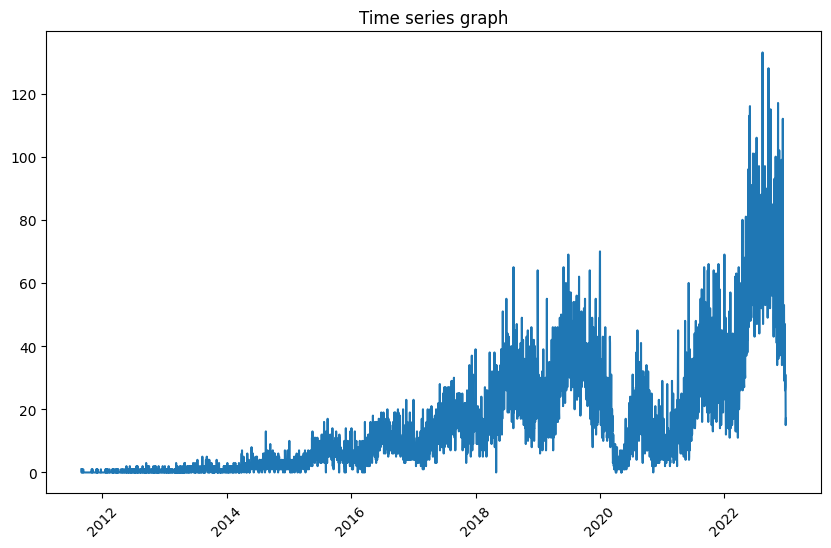

In [22]:
f, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(df_example['ts'])
ax.set_title('Time series graph')
ax.tick_params(axis='x', rotation=45)

plt.show()
plt.close()

The given function named `test_stationarity` that takes two arguments: a DataFrame `df` and a time series `ts`. The function calculates the rolling mean and standard deviation of the time series with a window size of 12 and plots them along with the original time series. The function also performs the Dickey-Fuller test on the time series to test for stationarity and prints the test results. The Dickey-Fuller test is a statistical test used to determine if a time series is stationary or not. A stationary time series is one whose statistical properties such as mean and variance do not change over time. Stationarity is an important property for time series analysis and forecasting.

In [27]:

from statsmodels.tsa.stattools import adfuller

def test_stationarity(df,ts):
    rolmean = df[ts].rolling(window=12, center = False).mean()
    rolstd = df[ts].rolling(window=12, center =False).std()

    #Set figure size
    plt.figure(figsize=(10,6))
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], color='blue', label='Original')
    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    
    std = plt.plot(rolstd, color='black', label='rolling std')
    
    plt.legend(loc='best')
    plt.title('Rolling mean & standard deviation for %s' % (ts))
    
    plt.xticks(rotation=45)
    plt.show(block=False)
    plt.close()
    
    
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(df[ts], autolag='aic')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',' # Lags Used', 'Number of Observeations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

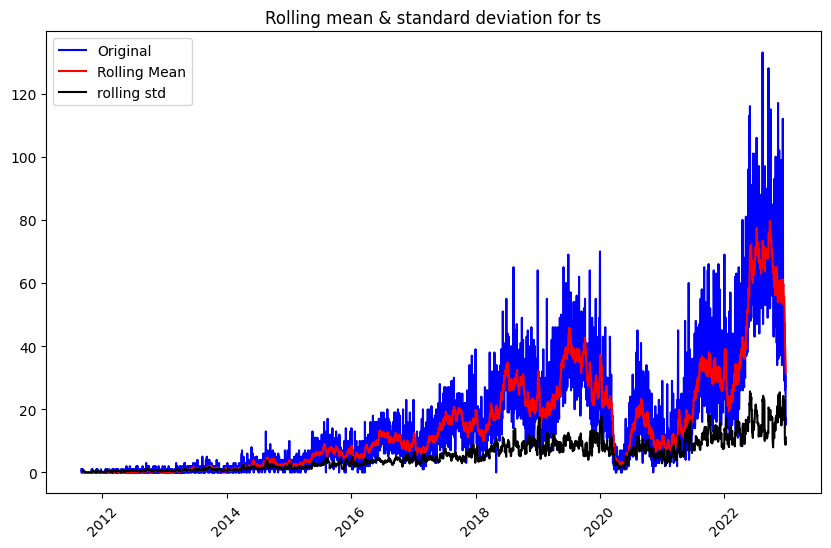

Results of Dickey-Fuller Test:
Test Statistic                    -1.455889
p-value                            0.555209
 # Lags Used                      29.000000
Number of Observeations Used    4110.000000
Critical Value (1%)               -3.431942
Critical Value (5%)               -2.862243
Critical Value (10%)              -2.567144
dtype: float64


In [28]:
test_stationarity(df=df_example, ts='ts')

The selected text shows the results of a Dickey-Fuller test performed on a time series. The Dickey-Fuller test is a statistical test used to determine if a time series is stationary or not. A stationary time series is one whose statistical properties such as mean and variance do not change over time. Stationarity is an important property for time series analysis and forecasting.

The test statistic is the result of the test, and the p-value is the probability of observing a test statistic as extreme as the one calculated if the null hypothesis (that the time series has a unit root and is therefore non-stationary) is true. In this case, the p-value is 0.55, which means that there is not enough evidence to reject the null hypothesis at common levels of significance (such as 5% or 1%).

The number of lags used and the number of observations used are reported to provide information about the data used in the test. The critical values at different levels of significance are also reported. These values can be compared to the test statistic to determine if the null hypothesis can be rejected at those levels of significance.

In [29]:
def plot_transformed_data(df, ts, ts_transform):
    # Plot time series data
    f, ax = plt.subplots(1,1)
    ax.plot(df[ts])
    ax.plot(df[ts_transform], color='red')
    
    ax.set_title('%s and %s time-series graph'%(ts, ts_transform))
    
    ax.tick_params(axis='x', rotation=45)
    ax.legend([ts, ts_transform])
    
    plt.show()
    plt.close()
    

The selected text shows a series of transformations applied to a time series stored in a DataFrame `df_example`. The original time series is stored in the `ts` column of the DataFrame. The following transformations are applied to the time series:

1. Log transformation: The natural logarithm of the time series values is calculated and stored in a new column `ts_log`.
2. 7-day moving average of the log-transformed time series: The 7-day moving average of the `ts_log` column is calculated and stored in a new column `ts_log_moving_avg`.
3. 7-day moving average of the original time series: The 7-day moving average of the `ts` column is calculated and stored in a new column `ts_moving_avg`.
4. Difference between the log-transformed time series and its first lag: The difference between the `ts_log` column and its first lag is calculated and stored in a new column `ts_log_diff`.
5. Difference between the original time series and its 7-day moving average: The difference between the `ts` column and the `ts_moving_avg` column is calculated and stored in a new column `ts_moving_avg_diff`.
6. Difference between the log-transformed time series and its 7-day moving average: The difference between the `ts_log` column and the `ts_log_moving_avg` column is calculated and stored in a new column `ts_log_moving_avg_diff`.
7. Exponentially weighted moving average (EWMA) of the log-transformed time series: The EWMA of the `ts_log` column with a half-life of 7 is calculated and stored in a new column `ts_log_ewma`.
8. Difference between the log-transformed time series and its EWMA: The difference between the `ts_log` column and the `ts_log_ewma` column is calculated and stored in a new column `ts_log_ewma_diff`.

After applying these transformations, several plots are created using the `plot_transformed_data` function to visualize the original time series and its transformed versions.

<ipython-input-30-15de19bfad04>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example_transform['ts_log_ewma'] = df_example_transform['ts_log'].ewm(halflife=7, ignore_na = False, min_periods = 0, adjust=True).mean()
<ipython-input-30-15de19bfad04>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example_transform['ts_log_ewma_diff'] = df_example_transform['ts_log']- df_example_transform['ts_log_ewma']


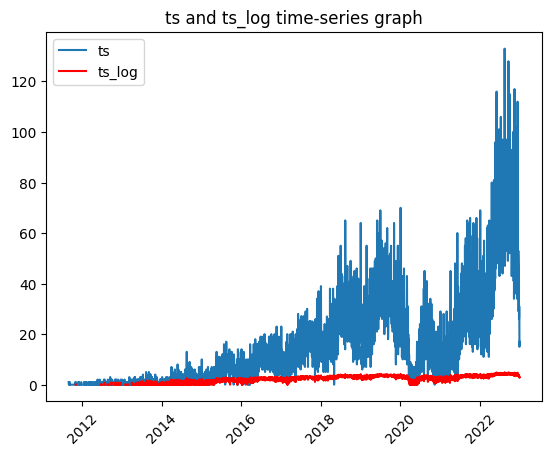

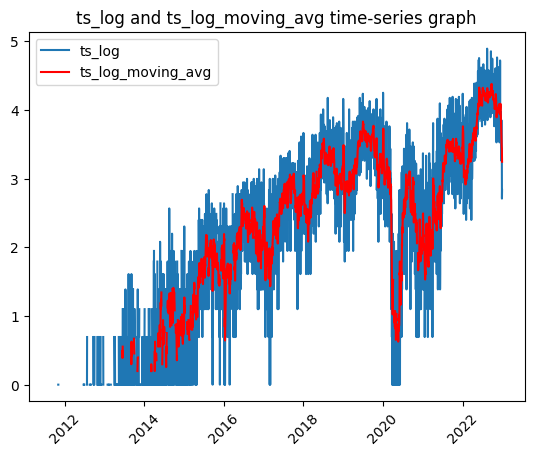

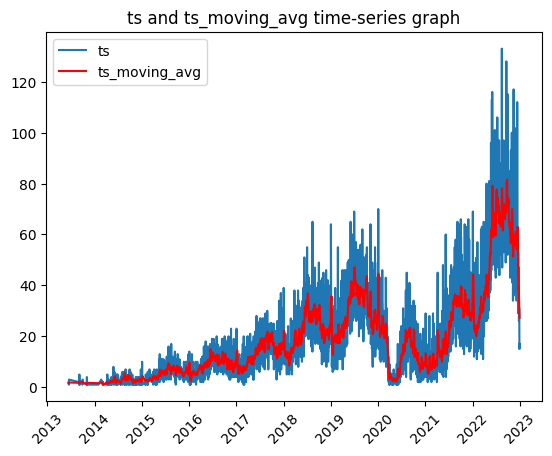

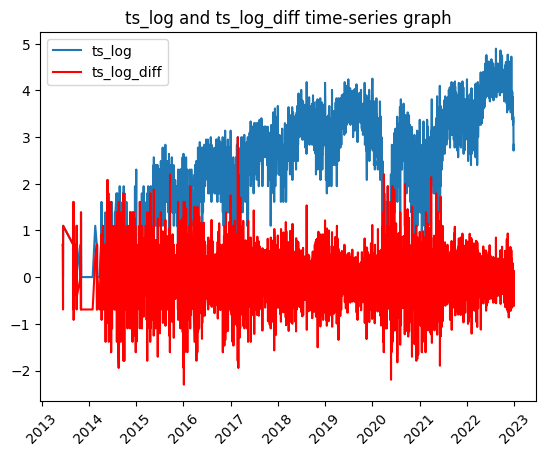

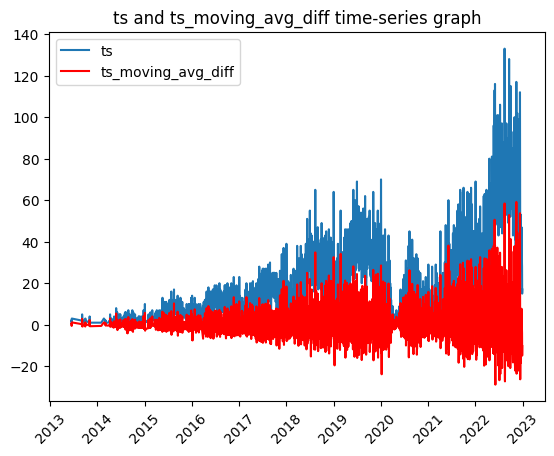

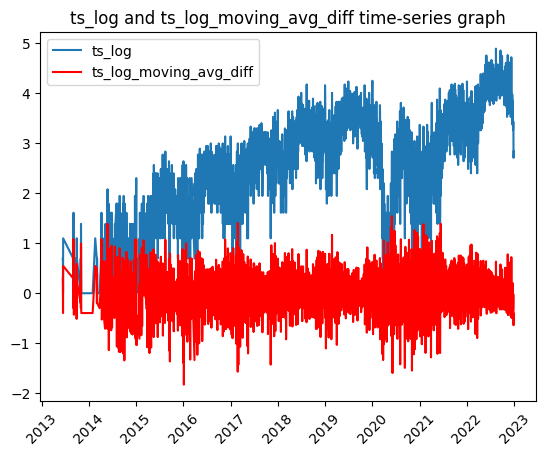

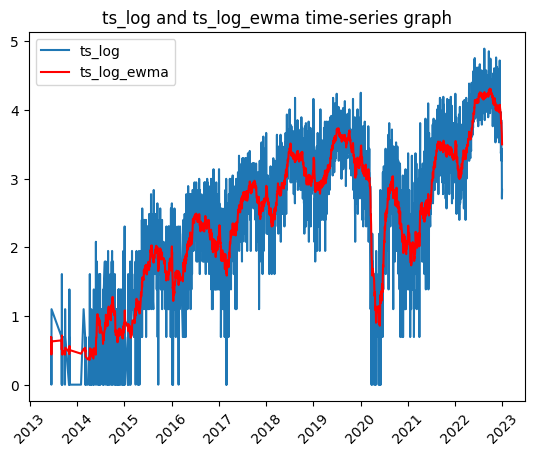

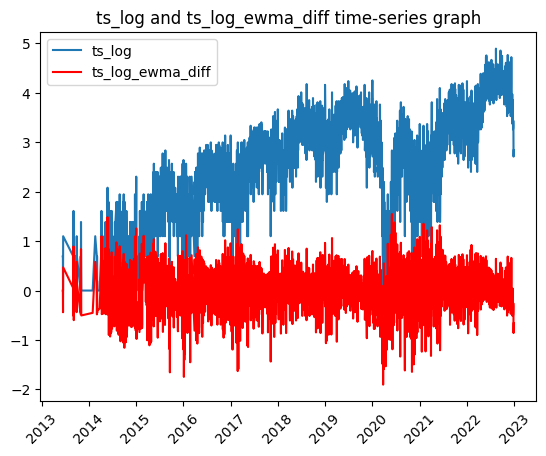

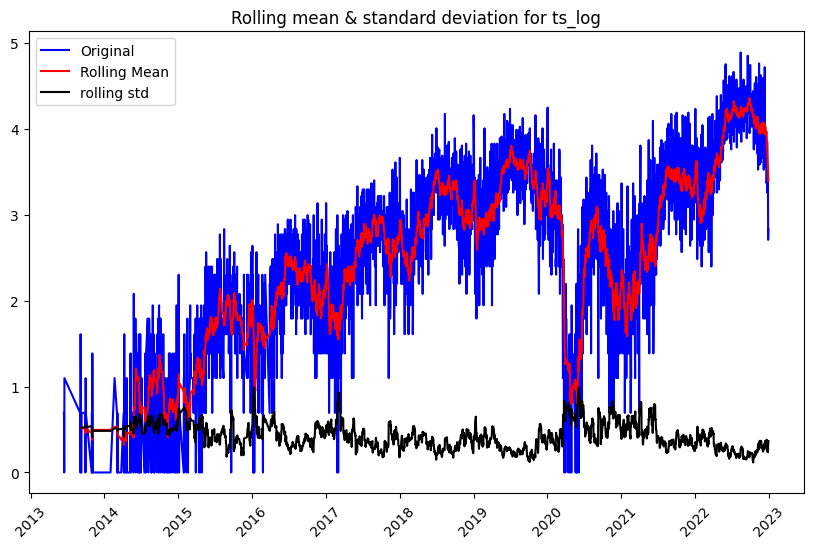

Results of Dickey-Fuller Test:
Test Statistic                    -2.650592
p-value                            0.082985
 # Lags Used                      29.000000
Number of Observeations Used    2949.000000
Critical Value (1%)               -3.432569
Critical Value (5%)               -2.862521
Critical Value (10%)              -2.567292
dtype: float64


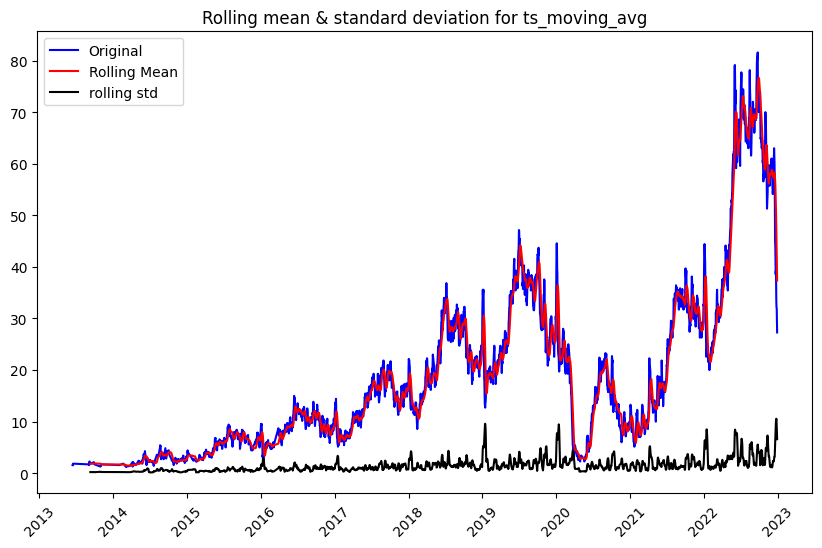

Results of Dickey-Fuller Test:
Test Statistic                    -1.706755
p-value                            0.427635
 # Lags Used                      29.000000
Number of Observeations Used    2949.000000
Critical Value (1%)               -3.432569
Critical Value (5%)               -2.862521
Critical Value (10%)              -2.567292
dtype: float64


In [30]:
# Transformation -log ts

df_example['ts_log'] = df_example['ts'].apply(lambda x:np.log(x))

# Transformation 7  day moving averages of log ts

df_example['ts_log_moving_avg'] = df_example['ts_log'].rolling(window=7, center=False).mean()

# Transformation -7 day moving average ts
df_example['ts_moving_avg'] = df_example['ts'].rolling(window=7, center=False).mean()

df_example['ts_log_diff'] = df_example['ts_log'].diff()

# Transformation - Difference between ts and moving average ts

df_example['ts_moving_avg_diff'] = df_example['ts']-df_example['ts_moving_avg']

# Transordiffmation - Difference between logged ts and logged moving
df_example['ts_log_moving_avg_diff']= df_example['ts_log']- df_example['ts_log_moving_avg']

# Transformation - Difference between logged ts and logged moving average
df_example_transform= df_example.dropna()

# Transformation - Logged exponentially weighted moving averages [EWMA]

df_example_transform['ts_log_ewma'] = df_example_transform['ts_log'].ewm(halflife=7, ignore_na = False, min_periods = 0, adjust=True).mean()


# Transformation - Difference between logged ts and logged ts  and logged EWMA ts

df_example_transform['ts_log_ewma_diff'] = df_example_transform['ts_log']- df_example_transform['ts_log_ewma']

# Display data
df_example_transform.head()

#plot data
plot_transformed_data(df= df_example, ts='ts', ts_transform='ts_log')

# Plot Data
plot_transformed_data(df=df_example, ts='ts_log', ts_transform='ts_log_moving_avg')

# Plot data
plot_transformed_data(df=df_example_transform, ts='ts', ts_transform='ts_moving_avg')

# plot data
plot_transformed_data(df=df_example_transform, ts='ts_log', ts_transform='ts_log_diff')

# plot data
plot_transformed_data(df=df_example_transform, ts='ts', ts_transform='ts_moving_avg_diff')

# plot data
plot_transformed_data(df=df_example_transform, ts='ts_log', ts_transform='ts_log_moving_avg_diff')

# plot
plot_transformed_data(df=df_example_transform, ts='ts_log', ts_transform='ts_log_ewma')

#plot
plot_transformed_data(df=df_example_transform, ts='ts_log', ts_transform='ts_log_ewma_diff')

#perform stationarity test
test_stationarity(df=df_example_transform, ts='ts_log')

# perform stationarity test
test_stationarity(df=df_example_transform, ts='ts_moving_avg')

To determine which result should be taken into account in the final stationarity check, we compare the results of the two stationarity tests.  The time series with the lower p-value 0.08 for ts_log could be considered a better candidate for further analysis.

In [31]:
def plot_decomposition(df, ts, trend, seasonal, residual):
    """
    Plot time series data
    """
    
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
    
    ax1.plot(df[ts], label='Original')
    ax1.legend(loc='best')
    ax1.tick_params(axis='x', rotation=45)
    
    ax2.plot(df[trend], label ='Trend')
    ax2.legend(loc='best')
    ax2.tick_params(axis='x', rotation=45)
    
    ax3.plot(df[seasonal], label='Seasonality')
    ax3.legend(loc='best')
    ax3.tick_params(axis='x', rotation=45)
    
    ax4.plot(df[residual], label='Residuals')
    ax4.legend(loc='best')
    ax4.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    
    
    # Show graph
    plt.suptitle('Trend seasonal, and Residual Decomposition of %s' %(ts), x=0.5, y=1.05, fontsize=18)
    plt.show()
    plt.close()

By performing the Dickey-Fuller test on the `residual` column of the DataFrame, we can determine if the residuals of a time series model are stationary or not. Stationary residuals are an important assumption for many time series models.

<ipython-input-33-974ce204796f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example_transform.loc[:, 'trend'] = decomposition.trend
<ipython-input-33-974ce204796f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example_transform.loc[:,'seasonal'] = decomposition.seasonal
<ipython-input-33-974ce204796f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

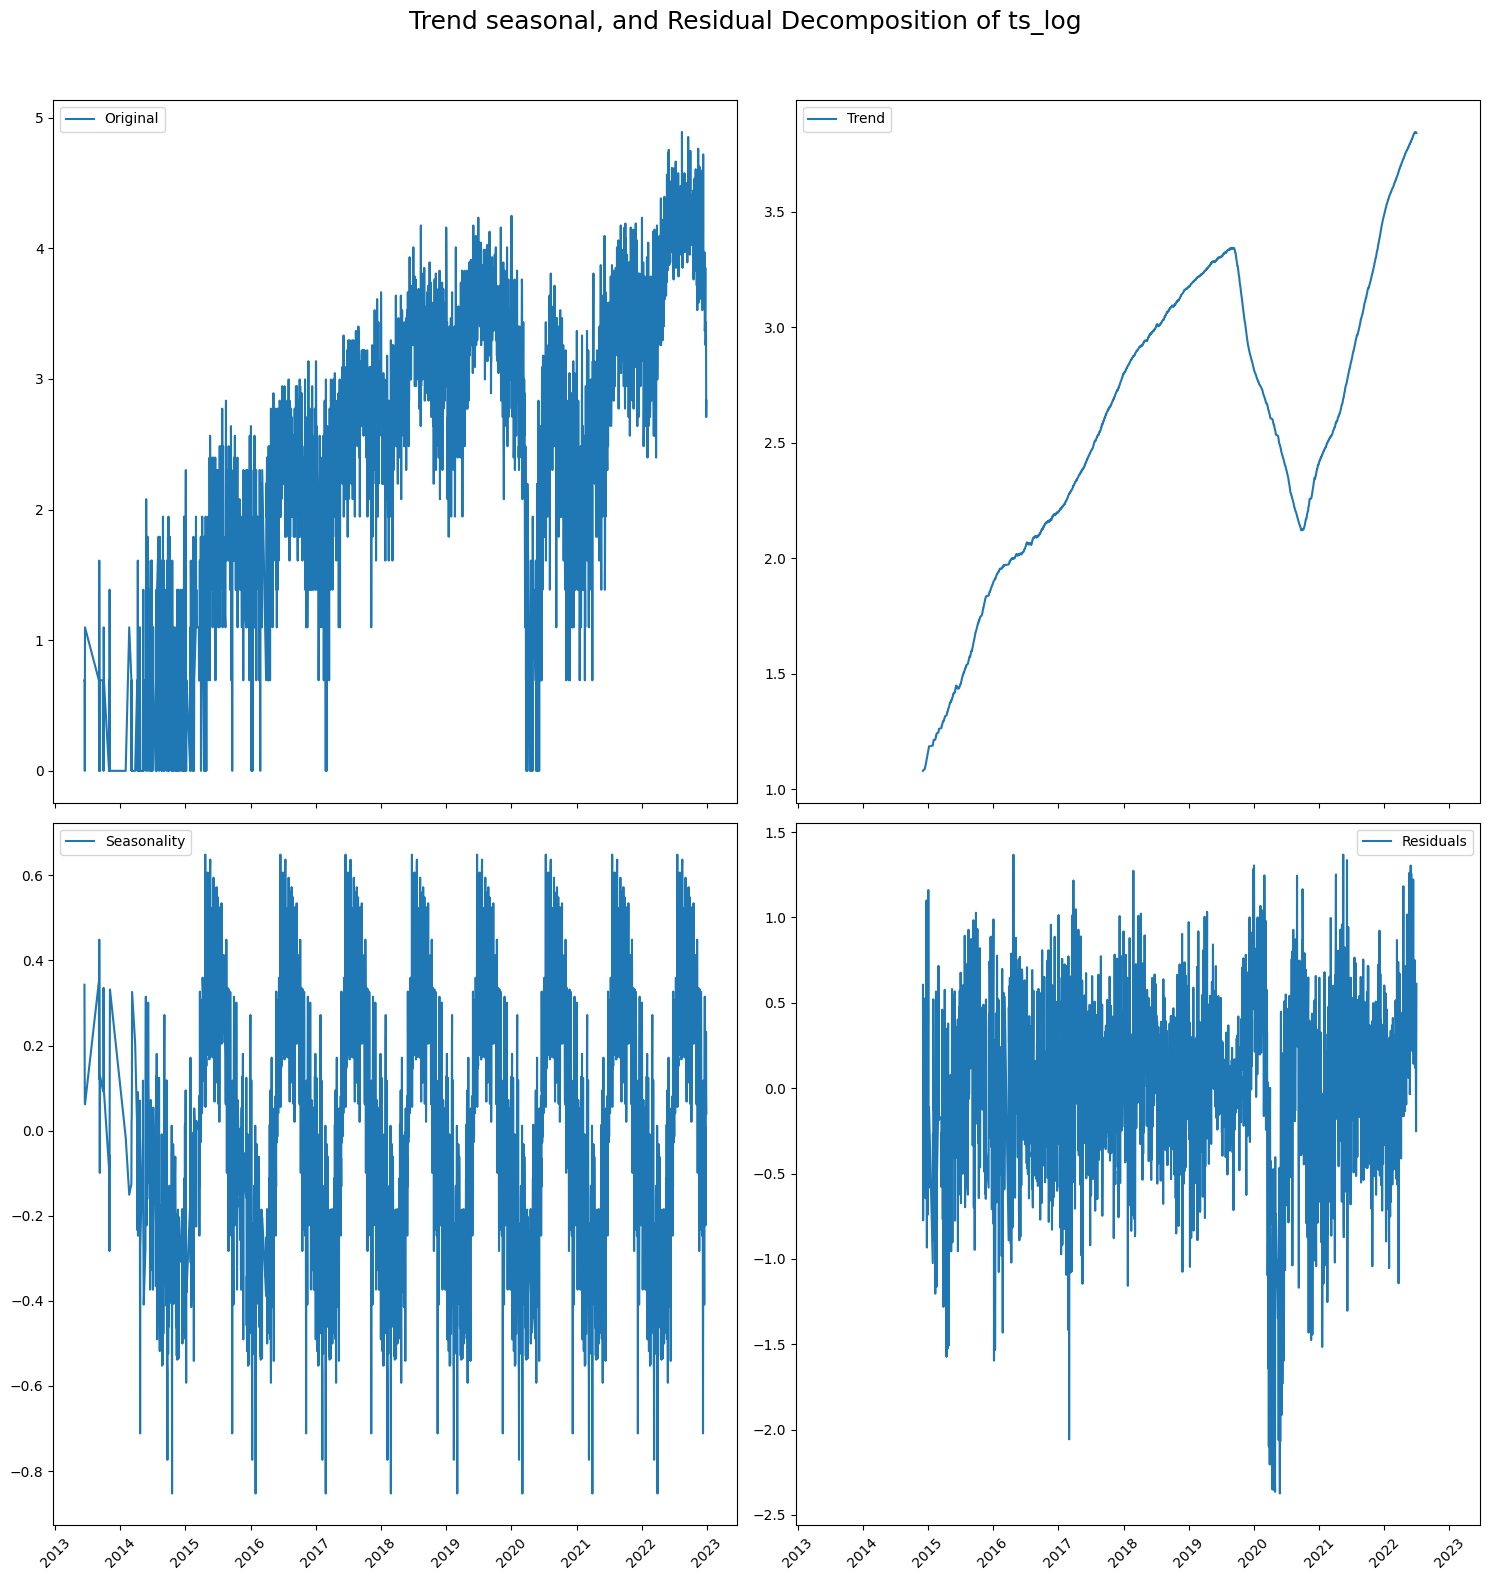

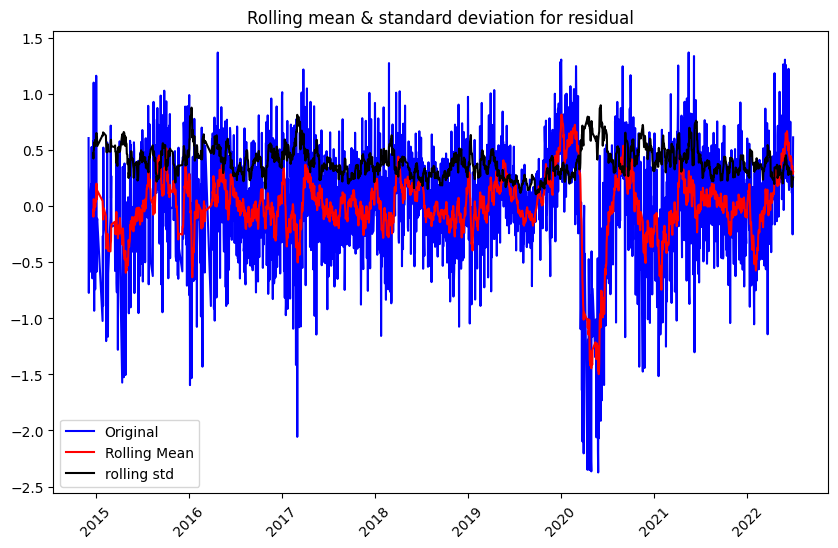

Results of Dickey-Fuller Test:
Test Statistic                    -4.805084
p-value                            0.000053
 # Lags Used                      28.000000
Number of Observeations Used    2586.000000
Critical Value (1%)               -3.432881
Critical Value (5%)               -2.862658
Critical Value (10%)              -2.567365
dtype: float64


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_example_transform['ts_log'], period=365)

df_example_transform.loc[:, 'trend'] = decomposition.trend
df_example_transform.loc[:,'seasonal'] = decomposition.seasonal
df_example_transform.loc[:, 'residual'] = decomposition.resid

plot_decomposition(df=df_example_transform, ts='ts_log', trend='trend', seasonal='seasonal', residual='residual')

test_stationarity(df=df_example_transform.dropna(), ts='residual')